# Ejercicio 1

¿Como podemos evaluar funciones en matrices? Hint: ¿que operaciones sabemos que estan bien definidas sobre matrices?

Existen diversas técnicas  para evaluar funciones en matrices (regularmente se pedirá como condición que ésta última sea una matriz cuadrada):

SERIE DE POTENCIAS

Si la función real f tiene la expansión de Taylor
 $$f(x)=f(0)+f(0) \cdot x+f''(0) \cdot {\frac{x^{2}} {2!}} + \cdots$$
 
entonces se puede definir una función matricial sustituyendo x por una matriz: las potencias se convierten en potencias matriciales , las adiciones se convierten en sumas matriciales y las multiplicaciones se convierten en operaciones por un escalar. Si la serie real converge para  $|x | <r$ , entonces la serie de matriz correspondiente convergerá para el argumento de matriz $A$ si  $||A||<r$ para alguna norma matricial $ | \cdot \ |$ que satisface  $|| AB|| <||A||||B||$.

MATRICES DIAGONALIZABLES

Si la matriz $A$ es diagonalizable , el problema puede reducirse a una matriz de la función en cada valor propio. Esto quiere decir que podemos encontrar una matriz $P$ y una matriz diagonal $D$ tal que  $ A = P \cdot D \cdot P ^ {- 1}$ . Aplicando la definición de serie de potencias a esta descomposición, encontramos que $f( A )$ se define por:

$$f (A) = P{\begin{bmatrix} f(d_ {1}) & \dots & 0 \\\vdots & \ddots & \vdots \\ 0 & \dots & f (d_ {n}) \end {bmatrix}} P ^ {- 1} $$


dónde $d_ {1}, \dots, d_ {n} d_ {1}, \dots, d_ {n}$ denotan las entradas diagonales de $D$.

DESCOMPOSICIÓN DE JORDAN

Todas las matrices complejas, ya sean diagonales o no, tienen una forma normal de Jordan  $A = P \cdot J \cdot P^{- 1} $ , donde la matriz J consiste en bloques de Jordan . Considere estos bloques por separado y aplique la serie de potencia a un bloque Jordan:

$$f\left({\begin{bmatrix}\lambda &1&0&\ldots &0\\0&\lambda &1&\vdots &\vdots \\0&0&\ddots &\ddots &\vdots \\\vdots &\ldots &\ddots &\lambda &1\\0&\ldots &\ldots &0&\lambda \end{bmatrix}}\right)={\begin{bmatrix}{\frac {f(\lambda )}{0!}}&{\frac {f'(\lambda )}{1!}}&{\frac {f''(\lambda )}{2!}}&\ldots &{\frac {f^{(n)}(\lambda )}{n!}}\\0&{\frac {f(\lambda )}{0!}}&{\frac {f'(\lambda )}{1!}}&\vdots &{\frac {f^{(n-1)}(\lambda )}{(n-1)!}}\\0&0&\ddots &\ddots &\vdots \\\vdots &\ldots &\ddots &{\frac {f(\lambda )}{0!}}&{\frac {f'(\lambda )}{1!}}\\0&\ldots &\ldots &0&{\frac {f(\lambda )}{0!}}\end{bmatrix}}$$
 
Esta definición puede usarse para extender el dominio de la función de la matriz más allá del conjunto de matrices con un radio espectral menor que el radio de convergencia de la serie de potencias. Tenga en cuenta que también hay una conexión a las diferencias divididas .

Una noción relacionada es la descomposición de Jordania-Chevalley que expresa una matriz como una suma de una parte diagonalizable y una parte nilpotente.


Cabe mencionar que estos son tan sólo algunos métodos para evaluar funciones en matrices.



# Ejercicio 2

¿Como se define una matriz simétrica?


Una matriz es simétrica si es una matriz cuadrada, la cual tiene la característica de ser igual a su matriz traspuesta.

# Ejercicio 3

¿Como puede construir una matriz simétrica a partir de cualquier matriz cuadrada?

Tomar la matriz original, sumarle su transpuesta y finalmente, dividir este resultado entre 2, es decir:
$$ A=\frac{1}{2}(B+B^T)$$

# Ejercicio 4

Construya el propagador $e^{A t}$ para cada tiempo sobre una malla y uselo para propagar un estado inicial $\vec x_0$ cualquiera. Utilice: $$A=\left(\begin{array}{cc} -1 & 1\\ -1 & -1 \end{array} \right).$$
Grafique la trayectoria en el espacio de fase.
Recuerde que $\vec x(t) = e^{A t}\vec x_0$, y necesitamos graficar la trayectoria $\vec x(t)$ en el espacio de fase.
Nota 1: De momento no utilicen expm.
Nota 2: El operador * funciona para multiplicar matrices.
Note 3: Observen que la matriz $A$ no es simétrica, aqui no se cumple que $w^T=w^{-1}$.

In [1]:
#Se instala la librería a utilizar durante el ejercicio.
using PyPlot

In [2]:
#Se define la matriz.
A=[-1 1; -1 -1]

2×2 Array{Int64,2}:
 -1   1
 -1  -1

In [3]:
vals=eigvals(A)

2-element Array{Complex{Float64},1}:
 -1.0+1.0im
 -1.0-1.0im

In [4]:
d=diagm(vals)

2×2 Array{Complex{Float64},2}:
 -1.0+1.0im   0.0+0.0im
  0.0+0.0im  -1.0-1.0im

In [5]:
w=eigvecs(A)

2×2 Array{Complex{Float64},2}:
 0.707107+0.0im       0.707107-0.0im     
      0.0+0.707107im       0.0-0.707107im

In [6]:
w*d*w'-A

2×2 Array{Complex{Float64},2}:
 2.22045e-16+0.0im  -2.22045e-16+0.0im
 2.22045e-16+0.0im   2.22045e-16+0.0im

In [78]:
#Se define el intervalo linspace en el que está definido el tiempo t
listt=linspace(1,10,10000)

10000-element LinSpace{Float64}:
 1.0,1.0009,1.0018,1.0027,1.0036,1.0045,…,9.9964,9.9973,9.9982,9.9991,10.0

In [79]:
#Se calcula la matriz exponencial de A.
x=w*diagm(exp.((vals)*listt[2]))*w'

2×2 Array{Complex{Float64},2}:
 0.198309+0.0im   0.30946+0.0im
 -0.30946+0.0im  0.198309+0.0im

In [80]:
#Se construye un for para iterar el valor del tiempo t dentro del itervalo antes definido.
function propagador(listt,x0)
   listx=[]
    push!(listx,x)
    for i in 1:length(listt)
        x=((w*diagm(exp.(vals*listt[i]))*w')*x0)'
        push!(listx,x)
    end
    return listx
end
    

propagador (generic function with 1 method)

In [67]:
#Se prueba la función "propagador" y se añade la condición inicial.
y=propagador(listt,[0,1])

1001-element Array{Any,1}:
 Complex{Float64}[0.98999+0.0im 0.00991014+0.0im; -0.00991014+0.0im 0.98999+0.0im]
 Complex{Float64}[0.0-0.0im 1.0-0.0im]                                            
 Complex{Float64}[0.00991014-0.0im 0.98999-0.0im]                                 
 Complex{Float64}[0.0196219-0.0im 0.979983-0.0im]                                 
 Complex{Float64}[0.0291373-0.0im 0.969979-0.0im]                                 
 Complex{Float64}[0.0384582-0.0im 0.959981-0.0im]                                 
 Complex{Float64}[0.0475868-0.0im 0.949991-0.0im]                                 
 Complex{Float64}[0.056525-0.0im 0.94001-0.0im]                                   
 Complex{Float64}[0.0652749-0.0im 0.930041-0.0im]                                 
 Complex{Float64}[0.0738383-0.0im 0.920084-0.0im]                                 
 Complex{Float64}[0.0822174-0.0im 0.910143-0.0im]                                 
 Complex{Float64}[0.0904141-0.0im 0.900218-0.0im]           

In [68]:
#Accedemos al elemento deseado, para finalmente graficar.
listx=map(x->x[1],y)

1001-element Array{Any,1}:
     0.98999+0.0im
         0.0-0.0im
  0.00991014-0.0im
   0.0196219-0.0im
   0.0291373-0.0im
   0.0384582-0.0im
   0.0475868-0.0im
    0.056525-0.0im
   0.0652749-0.0im
   0.0738383-0.0im
   0.0822174-0.0im
   0.0904141-0.0im
   0.0984304-0.0im
            ⋮     
 -2.27332e-5-0.0im
 -2.29545e-5-0.0im
  -2.3167e-5-0.0im
 -2.33706e-5-0.0im
 -2.35656e-5-0.0im
  -2.3752e-5-0.0im
   -2.393e-5-0.0im
 -2.40997e-5-0.0im
 -2.42613e-5-0.0im
 -2.44149e-5-0.0im
 -2.45606e-5-0.0im
 -2.46985e-5-0.0im

In [69]:
listy=map(x->x[2],y)

1001-element Array{Any,1}:
 -0.00991014+0.0im
         1.0-0.0im
     0.98999-0.0im
    0.979983-0.0im
    0.969979-0.0im
    0.959981-0.0im
    0.949991-0.0im
     0.94001-0.0im
    0.930041-0.0im
    0.920084-0.0im
    0.910143-0.0im
    0.900218-0.0im
    0.890311-0.0im
            ⋮     
 -4.53004e-5-0.0im
 -4.46216e-5-0.0im
 -4.39475e-5-0.0im
  -4.3278e-5-0.0im
 -4.26132e-5-0.0im
 -4.19531e-5-0.0im
 -4.12978e-5-0.0im
 -4.06473e-5-0.0im
 -4.00016e-5-0.0im
 -3.93608e-5-0.0im
 -3.87248e-5-0.0im
 -3.80938e-5-0.0im

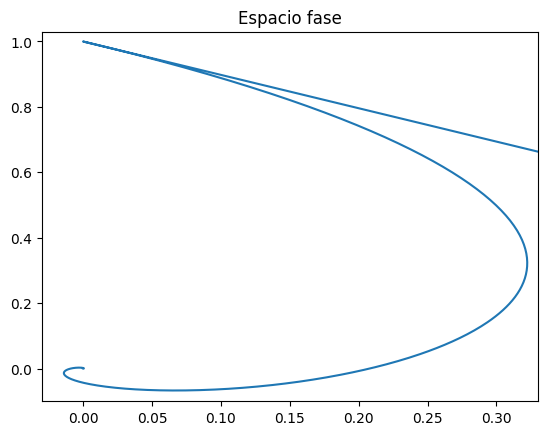

(-0.1,1.03)

In [75]:
#Se presenta a continuación el espacio fase.
plot(listx,listy)
title("Espacio fase")
axes()[:set_xlim]([-0.03,0.33])
axes()[:set_ylim]([-0.1,1.03])

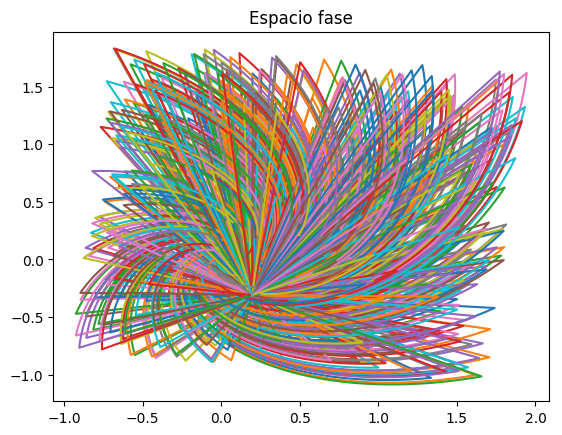

In [81]:
#Se implementa un for para generar condiciones iniciales aleatorias, y obtener un espacio fase más representativo.
list=linspace(0.1,1,1000)
for i in 1:800
CI=3*rand(2,1)-1
y=propagador(list,CI)
   plot(map(x->x[1],y),map(x->x[2],y))
    title("Espacio fase")
end